# DFT Basic Images
**A. Display 8 by 8 basic images of DFT conversion.**

**B. Due to the preservation of the structure in the base images with higher dimensions, if DFT conversion is applied, which of the base images will have more weight for each of the following images?**

**C. Display Fourier transform of each the above images in both size and phase as well as real and imaginary sections.**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `cmath` for using math functions

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cmath

In the following code snippet we will calculate transfrom matrix, then we will multiple each column of it with transposed column in order to find basic images.

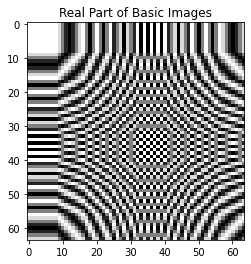

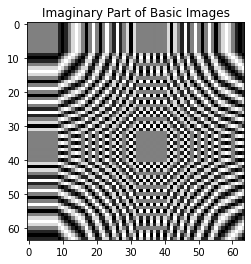

In [126]:
N = 8
# Calculate transform matrix
F = np.zeros((N, N), dtype=np.complex)
for n in range(1, N + 1):
    for k in range(1, N + 1):
        F[n - 1, k - 1] = cmath.exp(-1j * 2 * (cmath.pi / N) * (n - 1) * (k - 1))
# Define zero matrix for result
A = np.zeros((N ** 2, N ** 2), dtype=np.complex)

# Multiple each column with transposed column to find basic images
for u in range(N):
    for v in range(N):
        i, j = u * 8, v * 8
        column_u = F[:, u]
        row_v = F[v, :]
        A[i : i + 8, j : j + 8] = np.outer(column_u, row_v)
# Show real part of image
plt.imshow(A.real, cmap="gray")
plt.title("Real Part of Basic Images")
plt.show()

# Show imaginary part of image
plt.imshow(A.imag, cmap="gray")
plt.title("Imaginary Part of Basic Images")
plt.show()

### Part B

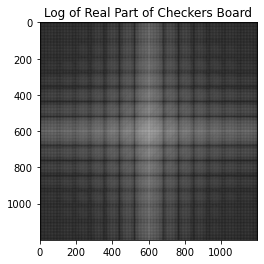

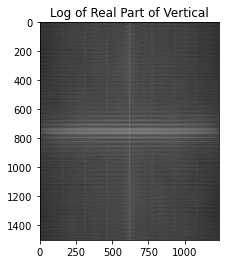

In [127]:
# Load image
checker_board = cv2.imread("../../images/CheckerBoard.png", 0)

# Use FFT
F = np.fft.fft2(checker_board)
F = np.fft.fftshift(F)
# Calculate logarithm of transformed image
log_F = np.log(1 + np.abs(F))

# Show image
plt.imshow(log_F.real, cmap="gray")
plt.title("Log of Real Part of Checkers Board")
plt.show()

# Load image
vertical = cv2.imread("../../images/vertical.png", 0)

# Use FFT
F = np.fft.fft2(vertical)
F = np.fft.fftshift(F)
# Calculate lograithm of transformed image
log_F = np.log(1 + np.abs(F))

# Show image
plt.imshow(log_F.real, cmap="gray")
plt.title("Log of Real Part of Vertical")
plt.show()


As we can see in the first image, it has both vertical and horizontal structures, so in the transformed version it involve first columns and rows and corresponding basic images. (central rows and columns in shifted version).

In the second image, we only have vertical structure so the transformed image only has first rows and rows and corresponding basic images. (central row in the shifted version).

### Part C

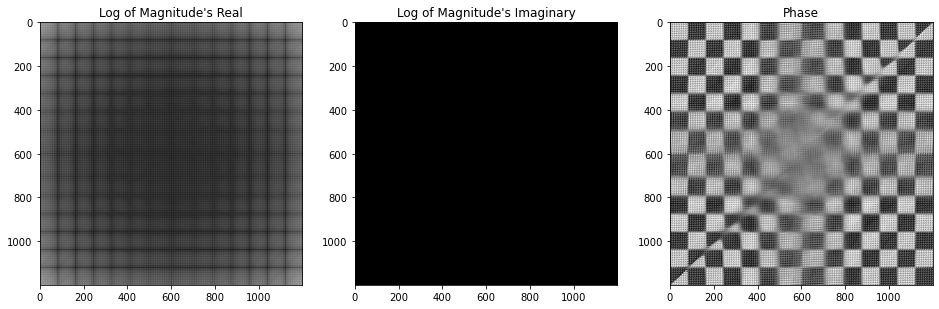

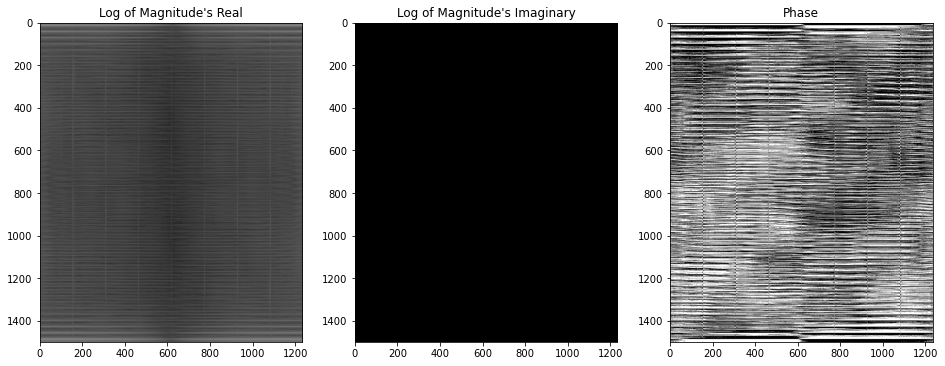

In [129]:
# Calculate transformed image
F = np.fft.fft2(checker_board)
log_F = np.log(1 + np.abs(F))
# Calculate phase
phase = np.arctan(F.imag, F.real)

# Show different versions of image
f, subplt = plt.subplots(1, 3, figsize=(16, 12))
subplt[0].imshow(log_F.real, cmap="gray")
subplt[0].set_title("Log of Magnitude's Real")
subplt[1].imshow(log_F.imag, cmap="gray")
subplt[1].set_title("Log of Magnitude's Imaginary")
subplt[2].imshow(phase, cmap="gray")
subplt[2].set_title("Phase")
plt.show()

# Calculate transformed image
F = np.fft.fft2(vertical)
log_F = np.log(1 + np.abs(F))
# Calculate phase
phase = np.arctan(F.imag, F.real)

# Show differnet versions of image
f, subplt = plt.subplots(1, 3, figsize=(16, 12))
subplt[0].imshow(log_F.real, cmap="gray")
subplt[0].set_title("Log of Magnitude's Real")
subplt[1].imshow(log_F.imag, cmap="gray")
subplt[1].set_title("Log of Magnitude's Imaginary")
subplt[2].imshow(phase, cmap="gray")
subplt[2].set_title("Phase")
plt.show()
